In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
df = pd.read_excel("Concrete_Data.xls")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [129]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [130]:
data = df.to_numpy()

In [141]:
X=data[:,1]
Y=data[:,8]

In [143]:
def step_gradient(X,Y, learning_rate, m , c):
    m_slope = 0
    c_slope = 0
    M = len(X)
    for i in range(M):
        x = X[i]
        y = Y[i]
        m_slope += (-2/M)* (y - m * x - c)*x
        c_slope += (-2/M)* (y - m * x - c)
    new_m = m - learning_rate*m_slope
    new_c = c - learning_rate*c_slope
    return new_m, new_c

def cost(X,Y, m, c):
    total_cost = 0
    M = len(X)
    for i in range(M):
        x = X[i]
        y = Y[i]
        total_cost += (1/2*M)*((y - m*x - c)**2)
    return total_cost

def gd(X,Y, learning_rate, num_iterations):
    m = 1/10
    c = 0
    cst=[10**9]
    for i in range(num_iterations):
        print(i, " Cost: ", cost(X,Y, m, c))
        m, c = step_gradient(X,Y, learning_rate, m , c)
        
    return m, c

In [138]:
def Scaling(x):
    mu = np.mean(x, axis = 0)  
    sigma = np.std(x, axis= 0, ddof = 1)  #standard deviation
    x_norm = (x - mu)/sigma
    return x_norm
X= Scaling(X)
X

array([-0.85647025, -0.85647025,  0.79514635, ...,  0.75921645,
        1.30743726,  0.30835409])

In [144]:
learning_rate = 0.1
num_iterations = 1000


m,c=gd(X,Y, learning_rate, num_iterations)
# m = 1/10
# c = 2
# print(cost(X,Y, m, c))
print(m,c)

0  Cost:  595438989.5287175
1  Cost:  658088146892208.5
2  Cost:  4.375622014463411e+21
3  Cost:  2.9093488959881618e+28
4  Cost:  1.9344246305119092e+35
5  Cost:  1.2861979724367744e+42
6  Cost:  8.551923906503817e+48
7  Cost:  5.686169941947145e+55
8  Cost:  3.780731559609996e+62
9  Cost:  2.5138065291338125e+69
10  Cost:  1.671428707984673e+76
11  Cost:  1.1113321146627503e+83
12  Cost:  7.389241689942983e+89
13  Cost:  4.913103115800911e+96
14  Cost:  3.266719812311117e+103
15  Cost:  2.172040374610885e+110
16  Cost:  1.4441885622269438e+117
17  Cost:  9.602402550370421e+123
18  Cost:  6.384632668546939e+130
19  Cost:  4.245139078313727e+137
20  Cost:  2.8225908567935848e+144
21  Cost:  1.876739253503936e+151
22  Cost:  1.247842994022706e+158
23  Cost:  8.296901846244172e+164
24  Cost:  5.516605901219485e+171
25  Cost:  3.667988513464849e+178
26  Cost:  2.438843733959034e+185
27  Cost:  1.6215859828449885e+192
28  Cost:  1.07819171156604e+199
29  Cost:  7.168891314971396e+205
30  C

c:\users\gopal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars


  Cost:  inf
48  Cost:  inf
49  Cost:  inf
50  Cost:  inf
51  Cost:  inf
52  Cost:  inf
53  Cost:  inf
54  Cost:  inf
55  Cost:  inf
56  Cost:  inf
57  Cost:  inf
58  Cost:  inf
59  Cost:  inf
60  Cost:  inf
61  Cost:  inf
62  Cost:  inf
63  Cost:  inf
64  Cost:  inf
65  Cost:  inf
66  Cost:  inf
67  Cost:  inf
68  Cost:  inf
69  Cost:  inf
70  Cost:  inf
71  Cost:  inf
72  Cost:  inf
73  Cost:  inf
74  Cost:  inf
75  Cost:  inf
76  Cost:  inf
77  Cost:  inf
78  Cost:  inf
79  Cost:  inf
80  Cost:  inf
81  Cost:  inf
82  Cost:  inf
83  Cost:  inf
84  Cost:  inf
85  Cost:  inf
86  Cost:  inf
87  Cost:  inf
88  Cost:  inf
89  Cost:  inf
90  Cost:  inf
91  Cost:  nan
92  Cost:  nan
93  Cost:  nan
94  Cost:  nan
95  Cost:  nan
96  Cost:  nan
97  Cost:  nan
98  Cost:  nan
99  Cost:  nan
100  Cost:  nan
101  Cost:  nan
102  Cost:  nan
103  Cost:  nan
104  Cost:  nan
105  Cost:  nan
106  Cost:  nan
107  Cost:  nan
108  Cost:  nan
109  Cost:  nan
110  Cost:  nan
111  Cost:  nan
112  Cost:  nan

c:\users\gopal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
c:\users\gopal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
c:\users\gopal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
c:\users\gopal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
c:\users\gopal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


  Cost:  nan
117  Cost:  nan
118  Cost:  nan
119  Cost:  nan
120  Cost:  nan
121  Cost:  nan
122  Cost:  nan
123  Cost:  nan
124  Cost:  nan
125  Cost:  nan
126  Cost:  nan
127  Cost:  nan
128  Cost:  nan
129  Cost:  nan
130  Cost:  nan
131  Cost:  nan
132  Cost:  nan
133  Cost:  nan
134  Cost:  nan
135  Cost:  nan
136  Cost:  nan
137  Cost:  nan
138  Cost:  nan
139  Cost:  nan
140  Cost:  nan
141  Cost:  nan
142  Cost:  nan
143  Cost:  nan
144  Cost:  nan
145  Cost:  nan
146  Cost:  nan
147  Cost:  nan
148  Cost:  nan
149  Cost:  nan
150  Cost:  nan
151  Cost:  nan
152  Cost:  nan
153  Cost:  nan
154  Cost:  nan
155  Cost:  nan
156  Cost:  nan
157  Cost:  nan
158  Cost:  nan
159  Cost:  nan
160  Cost:  nan
161  Cost:  nan
162  Cost:  nan
163  Cost:  nan
164  Cost:  nan
165  Cost:  nan
166  Cost:  nan
167  Cost:  nan
168  Cost:  nan
169  Cost:  nan
170  Cost:  nan
171  Cost:  nan
172  Cost:  nan
173  Cost:  nan
174  Cost:  nan
175  Cost:  nan
176  Cost:  nan
177  Cost:  nan
178  Cost: 

629  Cost:  nan
630  Cost:  nan
631  Cost:  nan
632  Cost:  nan
633  Cost:  nan
634  Cost:  nan
635  Cost:  nan
636  Cost:  nan
637  Cost:  nan
638  Cost:  nan
639  Cost:  nan
640  Cost:  nan
641  Cost:  nan
642  Cost:  nan
643  Cost:  nan
644  Cost:  nan
645  Cost:  nan
646  Cost:  nan
647  Cost:  nan
648  Cost:  nan
649  Cost:  nan
650  Cost:  nan
651  Cost:  nan
652  Cost:  nan
653  Cost:  nan
654  Cost:  nan
655  Cost:  nan
656  Cost:  nan
657  Cost:  nan
658  Cost:  nan
659  Cost:  nan
660  Cost:  nan
661  Cost:  nan
662  Cost:  nan
663  Cost:  nan
664  Cost:  nan
665  Cost:  nan
666  Cost:  nan
667  Cost:  nan
668  Cost:  nan
669  Cost:  nan
670  Cost:  nan
671  Cost:  nan
672  Cost:  nan
673  Cost:  nan
674  Cost:  nan
675  Cost:  nan
676  Cost:  nan
677  Cost:  nan
678  Cost:  nan
679  Cost:  nan
680  Cost:  nan
681  Cost:  nan
682  Cost:  nan
683  Cost:  nan
684  Cost:  nan
685  Cost:  nan
686  Cost:  nan
687  Cost:  nan
688  Cost:  nan
689  Cost:  nan
690  Cost:  nan
691  Cos

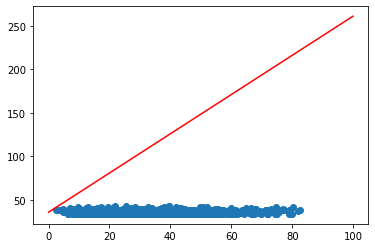

In [140]:
import matplotlib.pyplot as plt
plt.scatter(Y,X*m+c)
x_line = np.arange(0,100,0.1)
y_line = (m)* x_line + c
plt.plot(x_line, y_line, "r")
plt.show()